In [1]:
import pandas as pd

from IPython.display import Image
from IPython.display import YouTubeVideo

from pprint import pprint

# Utility Code in this Repo
from the_office.data import do_all_data_loading
from the_office.eda import (get_dialogue, line_search,
                            a_spoke_after_b)
from the_office.transform import (filter_cast,
                                  get_cast_by_scene,
                                  shared_scene_matrix,
                                  extract_corpus)
from the_office.viz import pairwise_scene_plot

# Intro

<!-- PELICAN_BEGIN_SUMMARY -->
The Office has been one of my all-time favorite shows since I caught the *"Michael Scott's Dunder Mifflin Scranton Meredith Palmer Memorial Celebrity Rabies Awareness Pro-Am Fun Run Race for the Cure"* episode back in 2007. It's absurdly quotable, it's lousy with memorable characters, and it's got one of the best finales I've seen of any show.

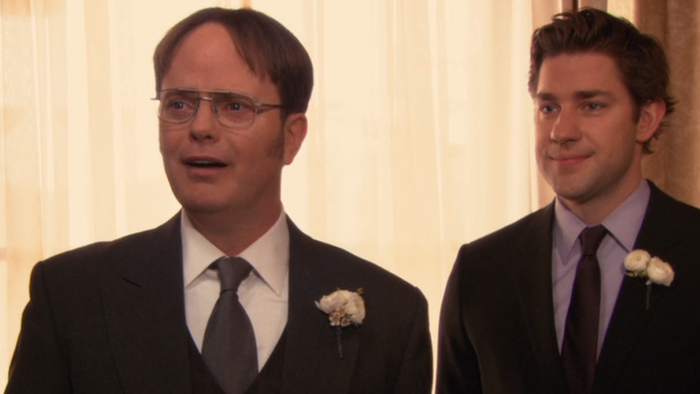

In [2]:
Image('images/finale1.PNG')

<center>No Spoilers.</center>

<!-- PELICAN_END_SUMMARY -->

So imagine my delight when I stumble across a dataset cataloguing every single line of dialogue across its 9 seasons. I had to do a bit of data cleaning before I started tinkering around with it (GitHub link below), but ultimately it came out looking like this:

In [3]:
df = do_all_data_loading()
df.head()

,id,season,episode,scene,line_text,speaker
0,1,1,1,1,All right Jim. Your quarterlies look very good...,michael
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",jim
2,3,1,1,1,So you've come to the master for guidance? Is ...,michael
3,4,1,1,1,"Actually, you called me in here, but yeah.",jim
4,5,1,1,1,"All right. Well, let me show you how it's done.",michael


Where each row represents a line of dialogue, labeled by when it happened in the script and who spoke it.

With the help of some simple text-parsing methods, we can better investigate this file for classic lines from the show.

In [4]:
line_search(df, 'bears. beets. battlestar galactica')

,id,season,episode,scene,line_text,speaker
13409,15346,3,20,1,Fact. Bears eat beets. Bears. Beets. Battl...,jim


<!-- PELICAN_END_SUMMARY -->

And filter down to the rows of data around them

In [5]:
bbbg = get_dialogue(df, season=3, episode=20, scenes=[1, 4])
bbbg

,id,season,episode,scene,line_text,speaker
13405,15342,3,20,1,[Dressed as Dwight] It's kind of blurry. [puts...,jim
13406,15343,3,20,1,That's a ridiculous question.,dwight
13407,15344,3,20,1,False. Black bear.,jim
13408,15345,3,20,1,Well that's debatable. There are basically tw...,dwight
13409,15346,3,20,1,Fact. Bears eat beets. Bears. Beets. Battl...,jim
13410,15347,3,20,1,Bears do not--- What is going on--- What are y...,dwight
13411,15348,3,20,2,"Last week, I was in a drug store and I saw the...",jim
13412,15349,3,20,3,You know what? Imitation is the most sincere ...,dwight
13413,15350,3,20,3,... MICHAEL!,jim
13414,15351,3,20,3,"Oh, that's funny. MICHAEL!",dwight


And print them for your captioning-convenience

In [6]:
import textwrap

for idx, row in bbbg.iterrows():
    *_, quote, speaker = row
    print(speaker + ':')
    wrapper = textwrap.TextWrapper(initial_indent='\t',
                                   subsequent_indent='\t')
    print(wrapper.fill(quote))

jim:
	[Dressed as Dwight] It's kind of blurry. [puts on his glasses] That's
	better. [exhales] Question.  What kind of bear is best?
dwight:
	That's a ridiculous question.
jim:
	False.  Black bear.
dwight:
	Well that's debatable.  There are basically two schools of thought---
jim:
	Fact.  Bears eat beets.  Bears.  Beets.  Battlestar Galactica.
dwight:
	Bears do not--- What is going on--- What are you doing?!
jim:
	Last week, I was in a drug store and I saw these glasses.  Uh, four
	dollars.  And it only cost me seven dollars to recreate the rest of
	the ensemble.  And that's a grand total of... [Jim calculates the
	total on his calculator-watch] eleven dollars.
dwight:
	You know what?  Imitation is the most sincere form of flattery, so I
	thank you. [Jim places a bobble-head on his desk]  Identity theft is
	not a joke, Jim!  Millions of families suffer every year!
jim:
	... MICHAEL!
dwight:
	Oh, that's funny.  MICHAEL!


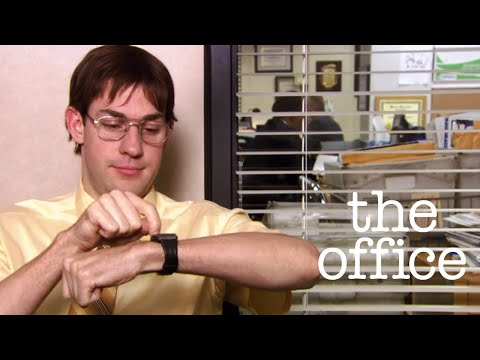

In [7]:
YouTubeVideo(id='WaaANll8h18', width=500)

Awesome.

# Looking at Text

## Words

Given that the show aired on NBC, it's a safe bet that hard searching for F-Bombs and other usual suspects will be fruitless. However, if we instead do a search for asterisks, as it would show up in the script, we can get to the bottom of who's got the foulest mouth at Dunder-Mifflin.

In [8]:
profanity = line_search(df, '\*')
profanity['speaker'].value_counts()

kevin       2
michael     2
kelly       1
deangelo    1
oscar       1
darryl      1
phyllis     1
jo          1
pam         1
toby        1
brandon     1
andy        1
robert      1
ryan        1
Name: speaker, dtype: int64

By the by, I'd highly encourage looking these up-- this show makes excellent use of the censor bleep, IMO

In [9]:
profanity

,id,season,episode,scene,line_text,speaker
7662,9564,3,1,31,"I watch the L Word. I watch, Queer as F***, s...",michael
11959,13896,3,15,25,This is bull****!,michael
16147,18084,4,2,68,[pointing] Um... [camera reveals that 'RYAN' i...,oscar
28409,30346,5,25,21,Oh! Mother ******!,phyllis
29304,31241,6,2,18,I can't believe this. [mistaking Darryl's sist...,toby
29361,31298,6,2,26,"You come to my house, bust up my trash cans, c...",darryl
41753,43690,7,18,15,My mom makes the best pesto in the world. And ...,ryan
41815,43752,7,18,25,Holy s*** is that real?,pam
42672,44609,7,21,34,Gimme that damn dog you f***ing thief! Don't e...,deangelo
43460,45397,7,24,43,"I don't have any, assh***.",kelly


Digging around for specific words also yielded some surprising results.

For instance, that Meredith is, curiously, only the sixth-highest user of the word "Drink"

In [10]:
line_search(df, 'drink')['speaker'].value_counts().head(6)

michael     38
dwight      22
jim         19
pam         12
andy        10
meredith     9
Name: speaker, dtype: int64

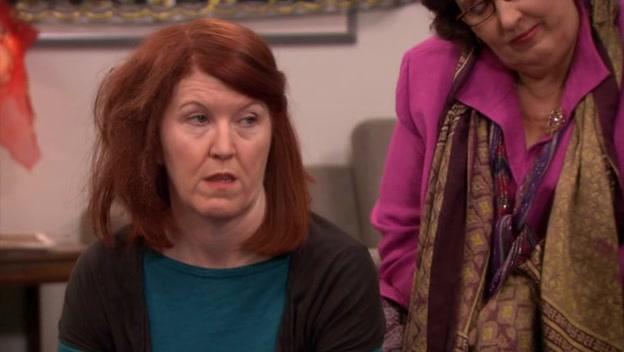

In [11]:
Image('images/meredith.jpg')

Or that Michael spends as much time putting his foot in his mouth about gay culture as the only gay character spends talking about it.

In [12]:
line_search(df, 'gay')['speaker'].value_counts().head()

oscar      31
michael    31
dwight     17
andy       15
pam         8
Name: speaker, dtype: int64

And less-surprising, is that Andy is far and away the biggest user of the word 'Tuna'.

In [13]:
line_search(df, 'tuna')['speaker'].value_counts()

andy                63
jim                 13
dwight               9
michael              7
walter jr            2
erin                 2
kevin                2
holly                2
gabe                 2
mark                 1
both                 1
david wallace        1
creed                1
angela               1
robert               1
front desk clerk     1
kelly                1
Name: speaker, dtype: int64

## Phrases

Of course, the best and most obvious use of our ability to zero-in on keywords in every script is to run some numbers on Michael's many, many "That's what she said" jokes.

His track record of often-ill-timed, always-inappropriate innuendos began early in the second season of the show and lasted consistently through his tenure on The Office, cresting in perhaps the dumbest, most-touching context the joke will ever see.

First, let's get ahold of each instance of the phrase

In [14]:
twss = line_search(df, 'that\'s what she said')
twss = twss[twss['speaker'] == 'michael']
twss

,id,season,episode,scene,line_text,speaker
1963,2545,2,2,24,That's what she said. Pam?,michael
2012,2594,2,2,34,THAT'S WHAT SHE SAID!,michael
4090,5325,2,10,2,"A, that's what she said, and B, I wanted it to...",michael
6026,7644,2,17,6,That's what she said!,michael
7044,8872,2,21,22,That's what she said. [Jim mouths these words ...,michael
7722,9624,3,1,49,I am glad that today spurred social change. T...,michael
10692,12594,3,10,49,Oh. [She whispers in his ear. Michael starts t...,michael
12365,14302,3,17,9,That's what she said.,michael
13449,15386,3,20,11,"No, no. I need two men on this. That's what ...",michael
15633,17570,4,2,6,Hey. Can you make that straighter? That's what...,michael


A respectible 23 times.

It's also worth a nod to the fact that on at least 13 occasions, someone else shared Michael's burden.

In [15]:
copycats = line_search(df, 'that\'s what she said')
copycats = copycats[copycats['speaker'] != 'michael']
len(copycats)

13

And that when we do a similar search on 'he' instead of 'she', we've shared the love 4 times.

In [16]:
twhs = line_search(df, 'that\'s what he said')
len(twhs)

4

One thing I was curious about, though, was who was teeing Michael up for these jokes. Getting at that was easy enough. We already have each row of data that he says it. All we have to do is grab the row right before it.

Your leaderboard:

In [17]:
df.loc[twss.index - 1]['speaker'].value_counts()

jim             5
michael         3
lester          3
jan             2
kevin           1
holly           1
angela          1
darryl          1
pam             1
second cindy    1
phyllis         1
gabe            1
andy            1
dwight          1
Name: speaker, dtype: int64

Unsurprisingly, Michael sets himself up often (and astute readers will have noticed that some lines above have him doing just that within the span of a sentence or two.)

But who's Lester?

A bit of poking around, and it turns out that Lester is the name of the attourney that was deposing him in season 4, lol

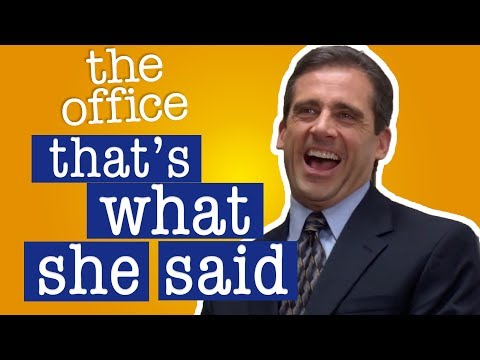

In [18]:
YouTubeVideo('ClzJkv3dpY8', start=240, end=288, width=500)

## Michael Hates Toby

Another interesting avenue within the text data is looking at how vocabulary changes character-to-character.

If you've ever seen these two interact, it wouldn't surprise you to learn that Michael's firey hatred for his colleague in HR comes with a good deal of engendered language. And not just the word "No." (when he learns that Toby has abruptly come back to work after being away for a season).

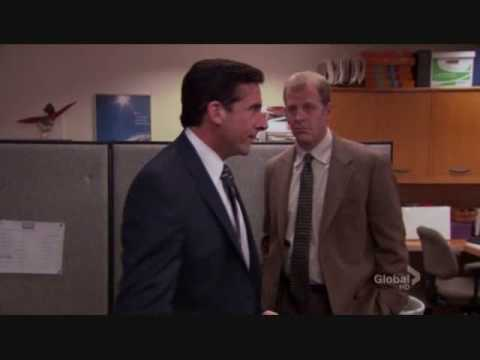

In [19]:
YouTubeVideo('NHh0rf0ojEc', width=500)

And so here, I found every line that Michael delivered within a line or two from Toby. 

In [20]:
# sample the first few records
michaelToToby = df[a_spoke_after_b(df, 'michael', 'toby')]
michaelToToby.head()

,id,season,episode,scene,line_text,speaker
340,382,1,2,16,Get out.,michael
342,384,1,2,16,"No, this is not a joke. OK? That was offensive...",michael
343,385,1,2,17,[on the tape] Hi. I'm Michael Scott. I'm in ch...,michael
1277,1651,1,6,12,"Toby, Katy.",michael
1283,1657,1,6,12,"Toby's divorced. He uh, guh recently, right?",michael


Then I extracted all of the unique words that he used throughout the course of the show when speaking to or shortly after him

In [21]:
michaelsWordsToToby = set(extract_corpus(michaelToToby))
print(len(michaelsWordsToToby), 'unique words')

1222 unique words


Then, I grabbed every line that Michael said *after people that he liked*. Most notably, his lovers... work friends... daughter-figures... Ryan.

And I compiled every unique word that he uses with *them*.

In [22]:
peopleMichaelLikes = ['ryan', 'jim', 'dwight', 'pam', 'holly',
                      'darryl', 'erin', 'oscar', 'david', 'jan']

niceWords = set()

for person in peopleMichaelLikes:
    michaelToPerson = df[a_spoke_after_b(df, 'michael', person)]
    niceWords = niceWords.union(set(extract_corpus(michaelToPerson)))
    
print(len(niceWords), 'unique words')

7680 unique words


This allowed me to generate words that Michael uniquely uses in reaction to someone he hates so damn much...

>"If I had a gun with two bullets and was in a room with Hitler, Bin Laden, and Toby, I would shoot Toby twice."

>-Michael Scott

...that he's never used with anyone else on the show.

In [23]:
print(michaelsWordsToToby - niceWords)

{'jerk-face', 'nutcases', 'retarded', 'souls', 'shaolin', 'lift', 'heartwarming', 'dawg', 'work-associated', 'assuming', 'culturally', 'principles', 'inferring', 'sream', 'molest', 'slepping', 'twisted', 'binder', 'mediators', 'welcoming', 'smack', 'mornin', 'pufnstuf', 'imploring', 'insisting', 'temple', 'bored', 'pitcher', 'grimaces', 'farting', 'immature', 'shine', 'icebreaker', 'retards', 'creedstanley', 'status', 'anti-christ', 'aaaah', 'benefit', 'zip', 'throats', 'climate', 'meantime', 'interruption', 'influence', 'heartless', 'plague', 'racist', 'anticipation', 'disorder', 'overstating', 'infected', 'mamas', 'balers', 'neve', 'punishment', 'noun', 'overstaying', 'sassy', 'committed', 'beeps', 'jeff', 'sweating', 'dealt', 'virus', 'joshin', 'heh', 'whomevers', 'resistance', 'radon', 'borientationtalks', 'affecting', 'gives-what-what', 'chosen', 'erics', 'lobster', 'interim', 'nigeria', 'crumbles', 'horribleness', 'cutie-pie', 'primary', 'includes', 'snail', 'powerful', 'doll', '

[Let me know your favorites!](https://twitter.com/NapsterInBlue)

Cheers,

-Nick

# Links

All of the source code for this post can be found at https://github.com/napsterinblue/the-office-lines

Credit to /u/misunderstoodpoetry [for actually pulling the dataset together](https://www.reddit.com/r/datasets/comments/6yt3og/every_line_from_every_episode_of_the_office_us/?st=jgwtj0fy&sh=41c5561d)